In [13]:
import diffrax
import jax
from jax.experimental import ode
import matplotlib.pyplot as pyplot

In [5]:
PARAMS = jax.numpy.array([1.0, 0.0], dtype=jax.numpy.float64)
MATRIX = jax.numpy.array([[2.0, 3.0], [1.0, 5.0]], dtype=jax.numpy.float64)
Y_INIT = jax.numpy.array([0.0, 0.0], dtype=jax.numpy.float64)

In [4]:
@jax.jit
def driving_term(t, args):
    return jax.numpy.full((2,), jax.numpy.exp(t)) * args

In [9]:
@jax.jit
def jax_ode(y, t, args):
    return MATRIX @ y + driving_term(t, args)

In [10]:
times = jax.numpy.linspace(0, 1, 100)

In [12]:
jax_solution = ode.odeint(jax_ode, Y_INIT, times, PARAMS)

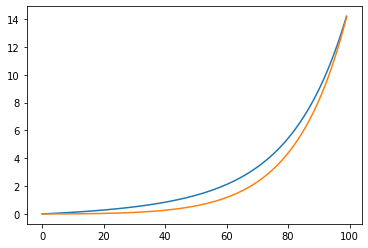

In [14]:
pyplot.plot(jax_solution)

So at this point I know that ode.odeint is faster when removed, but is recompiling every run for some fucking reason. I believe the recompilation is happening because I am calling a `jit`'ed function from within another `jit`'ed function. This behaviour can be avoided either using `static_argnums` or `jax.tree_util.Partial`.

I need to communicate with Ben and discuss the implications of these findings on the structure. So nothing came back at this point I am ready to riot. 